In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Variables
beta = 24
delta_E = 0.6
mu_E = 0.15
delta_J = 0.08
mu_J = 0.05
alpha = 0.003
omega = 0.5
mu_A = 0.1
t_0 = 0
t_end = 365
h = 0.005
y_0 = np.array([10, 0, 0])

In [56]:
# RK4 Function
def RK4(f:np.array, y_n:np.array, t_n:int, h:float) -> np.array:
    '''

    '''
    k1 = f(t_n, y_n)
    k2 = f(t_n + 0.5 * h, y_n + 0.5 * h * k1)
    k3 = f(t_n + 0.5 * h, y_n + 0.5 * h * k2)
    k4 = f(t_n + h, y_n + h*k3)

    y_nn = y_n + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y_nn

# Algorithm 2
def f(t_n, y_n,
      beta=beta,
      delta_E=delta_E,
      mu_E=mu_E,
      delta_J=delta_J,
      mu_J=mu_J,
      alpha=alpha,
      omega=omega,
      mu_A=mu_A):

    E = y_n[0]
    J = y_n[1]
    A = y_n[2]

    dE = beta * A - delta_E * E - mu_E * E
    dJ = delta_E * E - delta_J * J - alpha * np.square(J) - mu_J * J
    dA = omega * delta_J * J - mu_A * A

    dy = np.array([dE, dJ, dA])
    return dy

In [57]:
# Creating a vector T where the elements follow the pattern t0 + h(1 − i),
# where `i` denotes the position of the element in T.

In [124]:
int(t_end / h) + 2

36502

In [123]:
def create_time_vector(t_0, h, t_end):
    T = np.array([t_0 + h * (i - 1) for i in range(1, int(t_end / h) + 2)])
    return T

T = create_time_vector(t_0, h, t_end)

In [122]:
T

array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 3.6497e+02, 3.6498e+02,
       3.6499e+02], shape=(36500,))

In [64]:
import numpy as np

# Create the vector T based on the given pattern
T = np.array([t_0 + h * (1 - i) for i in range(int(t_end / h) + 1)])

In [63]:
T

array([ 0.00000e+00, -5.00000e-03, -1.00000e-02, ..., -3.64985e+02,
       -3.64990e+02, -3.64995e+02], shape=(73000,))

In [65]:
Y = []
for i in range(1, int(t_end/h) + 1):
    if i == 1:
        y_nn = RK4(f, y_0, T[i], h)
    else:
        y_nn = RK4(f, y_nn, T[i], h)
    Y.append(y_nn)


In [47]:
Y

array([[0.70577179, 0.54983807, 0.03673882],
       [0.30572597, 0.28964943, 0.5797612 ],
       [0.57370671, 0.33157347, 0.60140757],
       ...,
       [0.37430841, 0.51763585, 0.16229949],
       [0.71164777, 0.12527375, 0.82706232],
       [0.68973581, 0.96582096, 0.97246357]], shape=(1000, 3))

In [66]:
# Create an empty array to store the results
Y = np.zeros((len(T), 3))  # 3 columns for E, J, A
Y[0] = y_0  # Set initial values

# Loop over time steps and apply RK4
for i in range(1, len(T)):
    Y[i] = RK4(f, Y[i-1], T[i-1], h)

In [67]:
Y

array([[1.00000000e+01, 0.00000000e+00, 0.00000000e+00],
       [9.96257034e+00, 2.99340801e-02, 2.99510462e-06],
       [9.92528150e+00, 5.97366413e-02, 1.19608739e-05],
       ...,
       [3.22133278e+04, 2.51666645e+03, 1.00666651e+03],
       [3.22133278e+04, 2.51666645e+03, 1.00666651e+03],
       [3.22133278e+04, 2.51666645e+03, 1.00666651e+03]], shape=(73001, 3))

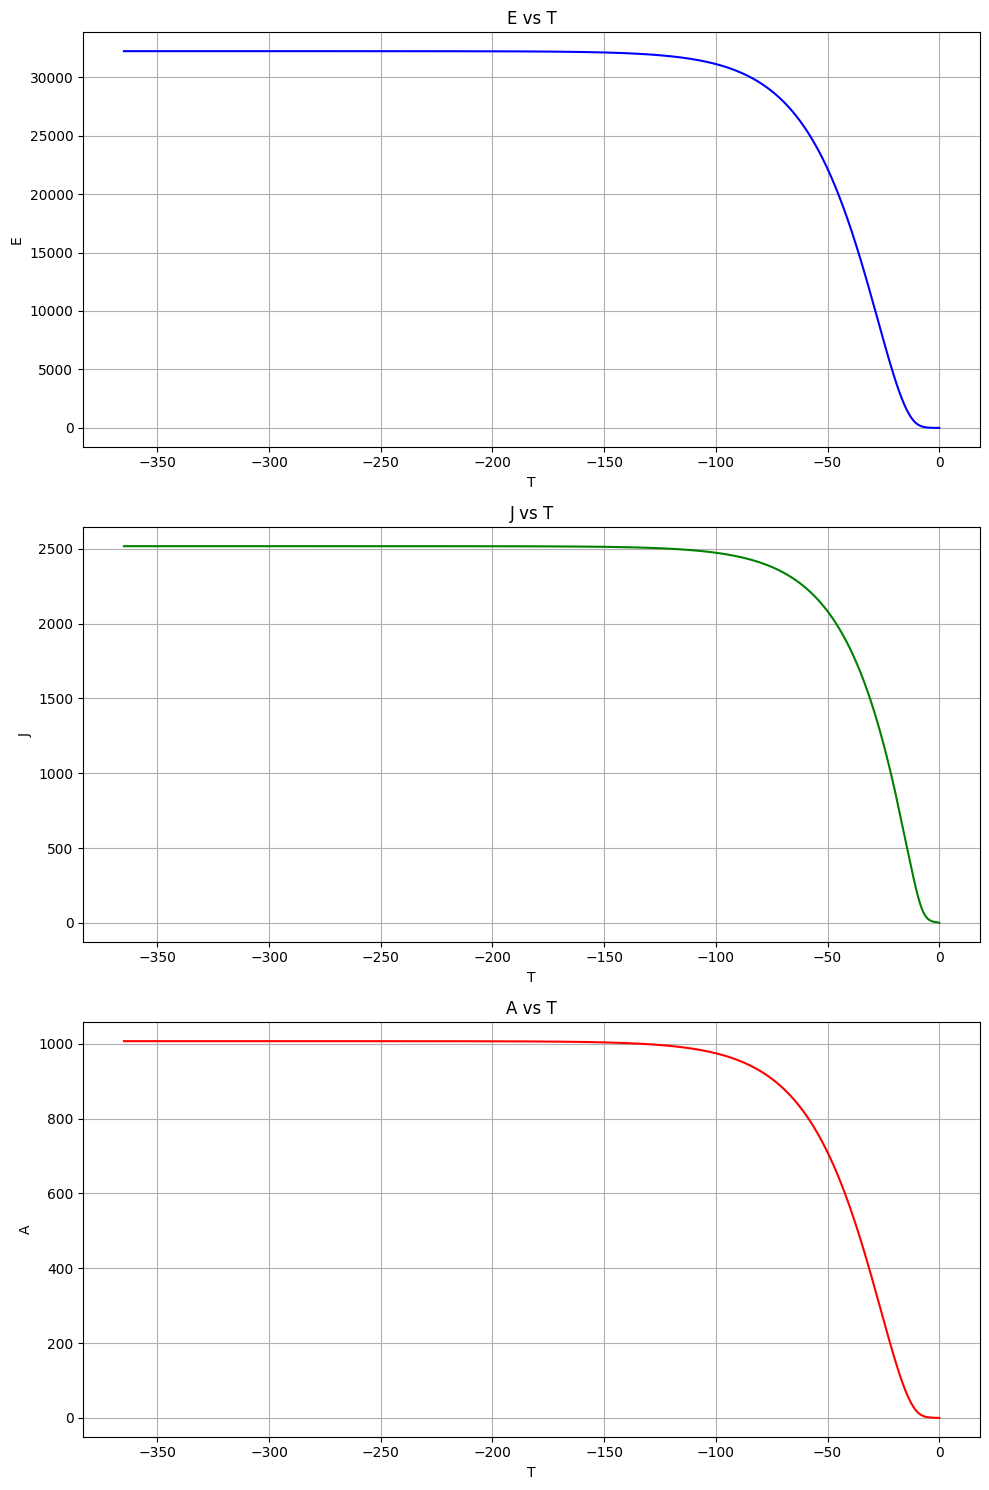

In [68]:
import matplotlib.pyplot as plt

# Create the subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# First subplot (E vs T)
axs[0].plot(T, Y[:, 0], label="E", color='b')
axs[0].set_xlabel('T')
axs[0].set_ylabel('E')
axs[0].set_title('E vs T')
axs[0].grid(True)

# Second subplot (J vs T)
axs[1].plot(T, Y[:, 1], label="J", color='g')
axs[1].set_xlabel('T')
axs[1].set_ylabel('J')
axs[1].set_title('J vs T')
axs[1].grid(True)

# Third subplot (A vs T)
axs[2].plot(T, Y[:, 2], label="A", color='r')
axs[2].set_xlabel('T')
axs[2].set_ylabel('A')
axs[2].set_title('A vs T')
axs[2].grid(True)

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Given variables
β = 24
δE = 0.6
μE = 0.15
δJ = 0.08
μJ = 0.05
α = 0.003
ω = 0.5
μA = 0.1
t0 = 0
tend = 365
h = 0.01
y0 = np.array([10, 0, 0])

# Create the time vector T using the pattern t0 + h(1 - i)
T[0] = t_0
T_decreasing = np.array([t_0 + h * (i - 1) for i in range(1, int(tend / h) + 2)])

# Print the first 10 and last 10 elements of T for verification
print("First 10 values of T:", T_decreasing[:10])
print("Last 10 values of T:", T_decreasing[-10:])

First 10 values of T: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
Last 10 values of T: [364.91 364.92 364.93 364.94 364.95 364.96 364.97 364.98 364.99 365.  ]


In [118]:
T = T_decreasing

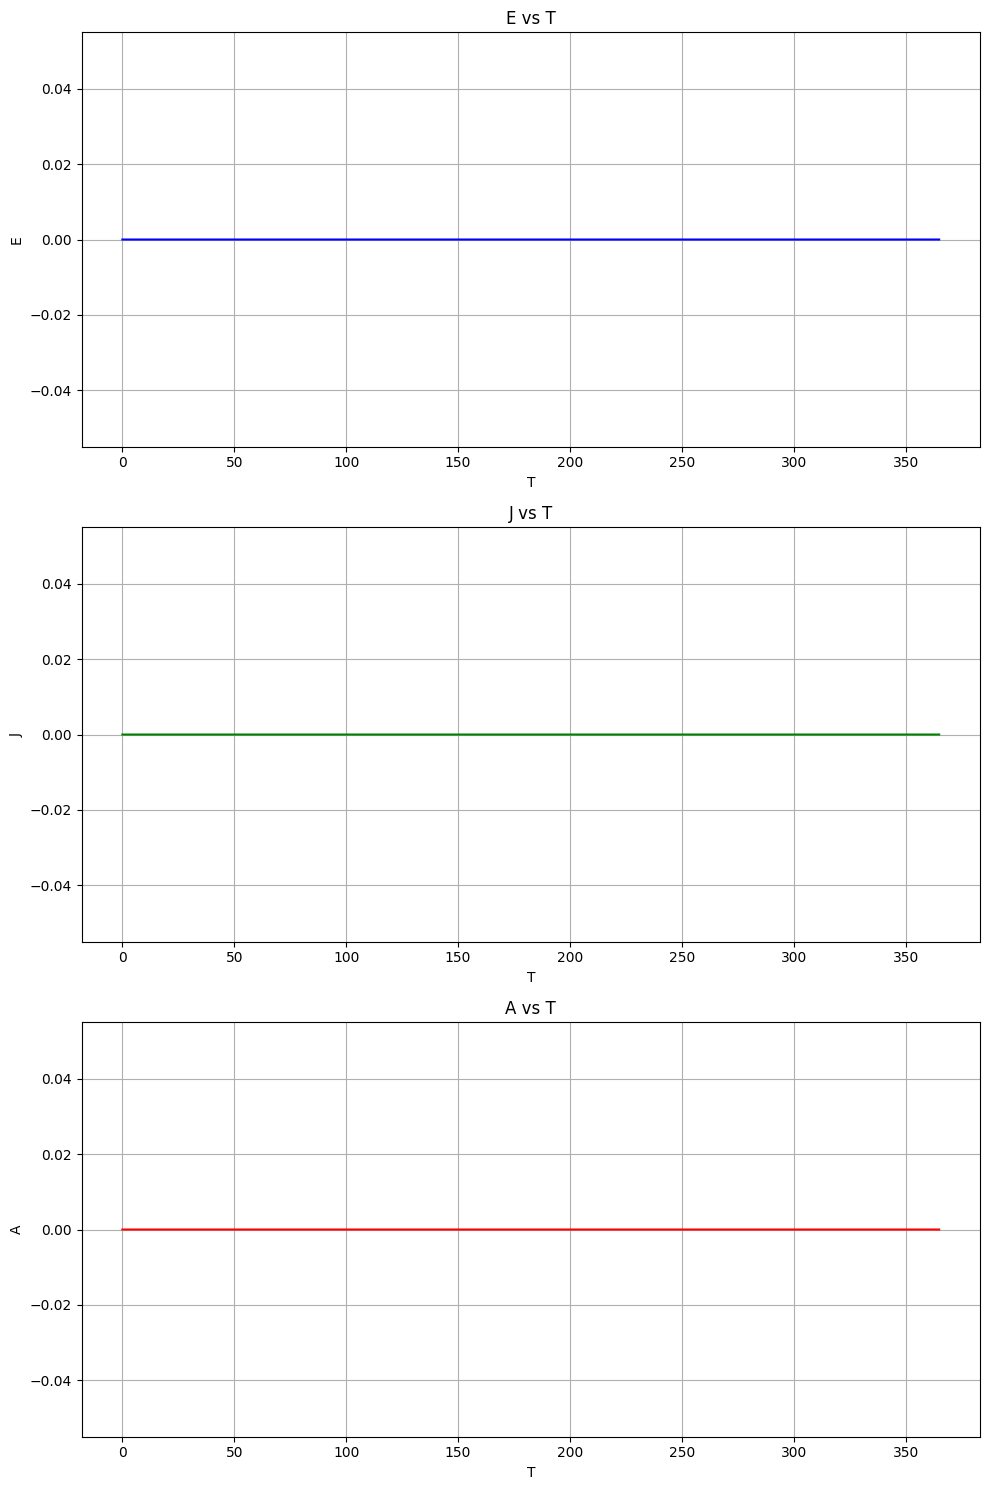

In [120]:
# RK4 Function (Algorithm 1)
def RK4(f, yn, tn, h, *params):
    k1 = f(tn, yn, *params)
    k2 = f(tn + 0.5 * h, yn + 0.5 * h * k1, *params)
    k3 = f(tn + 0.5 * h, yn + 0.5 * h * k2, *params)
    k4 = f(tn + h, yn + h * k3, *params)
    yn1 = yn + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return yn1

# Function f (Algorithm 2)
def f(tn, yn, β, δE, μE, δJ, μJ, α, ω, μA):
    E = yn[0]
    J = yn[1]
    A = yn[2]

    dE = β * A - δE * E - μE * E
    dJ = δE * E - δJ * J - α * J**2 - μJ * J
    dA = ω * δJ * J - μA * A

    return np.array([dE, dJ, dA])

# Create an empty array to store the results
Y = np.zeros((len(T), 3))  # 3 columns for E, J, A
Y[0] = y0  # Set initial values

# Loop over time steps and apply RK4
for i in range(len(T)):
    Y[i] = RK4(f, Y[i-1], T[i-1], h, β, δE, μE, δJ, μJ, α, ω, μA)

# Create the subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# First subplot (E vs T)
axs[0].plot(T, Y[:, 0], label="E", color='b')
axs[0].set_xlabel('T')
axs[0].set_ylabel('E')
axs[0].set_title('E vs T')
axs[0].grid(True)

# Second subplot (J vs T)
axs[1].plot(T, Y[:, 1], label="J", color='g')
axs[1].set_xlabel('T')
axs[1].set_ylabel('J')
axs[1].set_title('J vs T')
axs[1].grid(True)

# Third subplot (A vs T)
axs[2].plot(T, Y[:, 2], label="A", color='r')
axs[2].set_xlabel('T')
axs[2].set_ylabel('A')
axs[2].set_title('A vs T')
axs[2].grid(True)

# Display the plots
plt.tight_layout()
plt.show()
